Refer from https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/


In [31]:
# import the necessary packages
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist
    

In [32]:
# import the necessary packages
from sklearn.svm import LinearSVC
from imutils import paths
import argparse
import cv2
import os
# construct the argument parse and parse the arguments
training_path = '../data/raw/'
test_path = '../data/raw/lbm'
desc = LocalBinaryPatterns(24, 8)
data = []
labels = []

In [33]:
# loop over the training images
for imagePath in paths.list_images(training_path):
	# load the image, convert it to grayscale, and describe it
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	hist = desc.describe(gray)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append(imagePath.split(os.path.sep)[-2])
	data.append(hist)
# train a Linear SVM on the data
model = LinearSVC(C=1000.0, random_state=42)
model.fit(data, labels)

/Users/bruceliu/projects/milk_cls/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000.0, random_state=42)

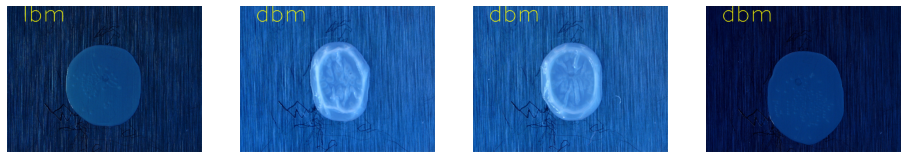

In [34]:
from matplotlib import pyplot as plt

# loop over the testing images
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
i = 0
for imagePath in paths.list_images(test_path):
	# load the image, convert it to grayscale, describe it,
	# and classify it
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	hist = desc.describe(gray)
	prediction = model.predict(hist.reshape(1, -1))
	
	# display the image and the prediction
	cv2.putText(image, prediction[0], (100, 100), cv2.FONT_HERSHEY_SIMPLEX,5.0, (255, 255, 0), 3)
# 	cv2.imshow("Image", image)
    #Show the image with matplotlib

        
	sp = plt.subplot(nrows, ncols, i + 1)
	sp.axis('Off')
	i = i + 1
	plt.imshow(image)
plt.show()